Financial markets are strongly influenced by investor psychology.  
The Fear and Greed Index is widely used to quantify market sentiment and capture emotional extremes.

This project explores the relationship between:
- Market sentiment (Fear vs Greed)
- Trader behavior and performance using historical trading data

Objectives
- Analyze trader performance under Fear and Greed market conditions
- Identify behavioral and risk-taking patterns
- Derive actionable insights to support smarter trading strategies

This analysisi uses two datasets: 
- Bitcoin market sentiment data
- Hostorical trader data 

In [3]:
#importing the libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set()

In [4]:
#loading the data

trades = pd.read_csv("historical_data.csv")
sentiment = pd.read_csv("fear_greed_index.csv")

In [5]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [6]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [58]:
#data inspection

trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   account           211224 non-null  object        
 1   coin              211224 non-null  object        
 2   execution_price   211224 non-null  float64       
 3   size_tokens       211224 non-null  float64       
 4   size_usd          211224 non-null  float64       
 5   side              211224 non-null  object        
 6   timestamp_ist     211224 non-null  object        
 7   start_position    211224 non-null  float64       
 8   direction         211224 non-null  object        
 9   closed_pnl        211224 non-null  float64       
 10  transaction_hash  211224 non-null  object        
 11  order_id          211224 non-null  int64         
 12  crossed           211224 non-null  bool          
 13  fee               211224 non-null  float64       
 14  trad

In [59]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [7]:
trades.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [19]:
#data cleaning and preprocessing

print(trades.columns)
print(sentiment.columns)

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp'],
      dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [20]:
trades['date'] = pd.to_datetime(trades['timestamp']).dt.date

In [21]:
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date


In [22]:
print(trades[['date']].head())
print(sentiment[['date', 'classification']].head())


         date
0  1970-01-01
1  1970-01-01
2  1970-01-01
3  1970-01-01
4  1970-01-01
         date classification
0  2018-02-01           Fear
1  2018-02-02   Extreme Fear
2  2018-02-03           Fear
3  2018-02-04   Extreme Fear
4  2018-02-05   Extreme Fear


In [23]:
trades['timestamp'].head()


0   1970-01-01 00:28:50
1   1970-01-01 00:28:50
2   1970-01-01 00:28:50
3   1970-01-01 00:28:50
4   1970-01-01 00:28:50
Name: timestamp, dtype: datetime64[ns]

In [25]:
trades = pd.read_csv("historical_data.csv")

In [26]:
trades.columns = trades.columns.str.strip().str.lower().str.replace(' ', '_')


In [27]:
trades['timestamp'].head()


0    1.730000e+12
1    1.730000e+12
2    1.730000e+12
3    1.730000e+12
4    1.730000e+12
Name: timestamp, dtype: float64

In [28]:
trades['timestamp'] = pd.to_datetime(trades['timestamp'], unit='ms')


In [29]:
unit='s'


In [30]:
trades['date'] = trades['timestamp'].dt.date


In [31]:
trades[['timestamp', 'date']].head()


,timestamp,date
0,2024-10-27 03:33:20,2024-10-27
1,2024-10-27 03:33:20,2024-10-27
2,2024-10-27 03:33:20,2024-10-27
3,2024-10-27 03:33:20,2024-10-27
4,2024-10-27 03:33:20,2024-10-27


In [32]:
#merging the trader data with market sentiment 

merged_df = trades.merge(
    sentiment[['date', 'classification']],
    on='date',
    how='left'
)


In [33]:
merged_df[['date', 'classification']].head(10)

,date,classification
0,2024-10-27,Greed
1,2024-10-27,Greed
2,2024-10-27,Greed
3,2024-10-27,Greed
4,2024-10-27,Greed
5,2024-10-27,Greed
6,2024-10-27,Greed
7,2024-10-27,Greed
8,2024-10-27,Greed
9,2024-10-27,Greed


In [34]:
merged_df['classification'].value_counts(dropna=False)

classification
Fear             133871
Greed             36289
NaN               26961
Neutral            7141
Extreme Greed      6962
Name: count, dtype: int64

In [35]:
merged_df['classification'].isna().mean()

0.12764174525622088

In [36]:
merged_df.head()

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,Greed


This merged dataset allows analysis of each trade in the context of prevailing market sentiment.


In [40]:
#feature enfineering

analysis_df = merged_df.dropna(subset=['classification']).copy()

In [41]:
analysis_df['is_profitable'] = analysis_df['closed_pnl'] > 0

In [46]:
analysis_df.columns

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp', 'date', 'classification', 'is_profitable'],
      dtype='object')

In [51]:
#average pnl comparison

pnl_summary = analysis_df.groupby('classification')['closed_pnl'].mean()
pnl_summary


classification
Extreme Greed    25.418772
Fear             50.047622
Greed            87.894859
Neutral          22.229713
Name: closed_pnl, dtype: float64

In [52]:
#win rate analysis

winrate_summary = analysis_df.groupby('classification')['is_profitable'].mean()
winrate_summary

classification
Extreme Greed    0.490089
Fear             0.415146
Greed            0.446471
Neutral          0.317182
Name: is_profitable, dtype: float64

Win rate is defined as the percentage of trades with positive PnL.


In [53]:
risk_summary = analysis_df.groupby('classification')['size_usd'].mean()
risk_summary

classification
Extreme Greed    5660.265764
Fear             5259.977837
Greed            3182.883845
Neutral          3058.848110
Name: size_usd, dtype: float64

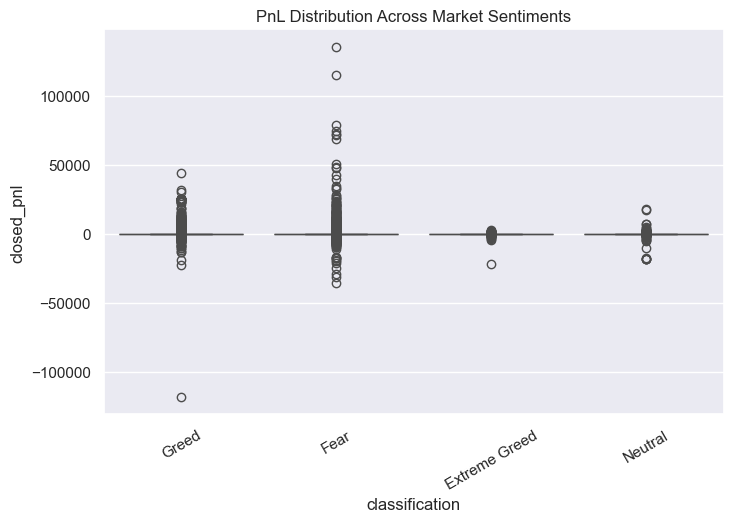

In [54]:
plt.figure(figsize=(8,5))
sns.boxplot(x='classification', y='closed_pnl', data=analysis_df)
plt.title("PnL Distribution Across Market Sentiments")
plt.xticks(rotation=30)
plt.show()


This boxplot compares how much profit or loss traders make under different market sentiment conditions that are shown in graph greed, fear, extreme greed and neutral. 
Here x-axis shows market sentiment means classification and y-axis shows closed_pnl above 0 is profit and below 0 is loss. 
Fear shows the widest spread
Greed shows large negative outliers, encourage risk taking which leads to heavy losses
Extreme Greed is relatively compressed
Neutral sentiment is more stable, it produce more predictable outcomes 

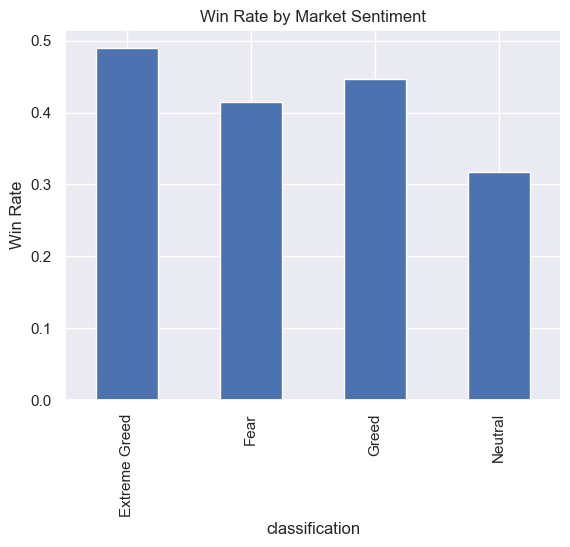

In [55]:
analysis_df.groupby('classification')['is_profitable'].mean().plot(
    kind='bar',
    title='Win Rate by Market Sentiment'
)
plt.ylabel("Win Rate")
plt.show()


The win-rate analysis highlights clear differences across sentiment regimes.

Extreme Greed exhibits the highest proportion of profitable trades, suggesting strong momentum-driven opportunities.

Greed phases also show relatively high win rates, while Fear reduces consistency despite occasional high returns.

Neutral sentiment results in the lowest win rate, indicating the absence of clear trading signals.

These findings reinforce the importance of aligning strategies with prevailing market sentiment.


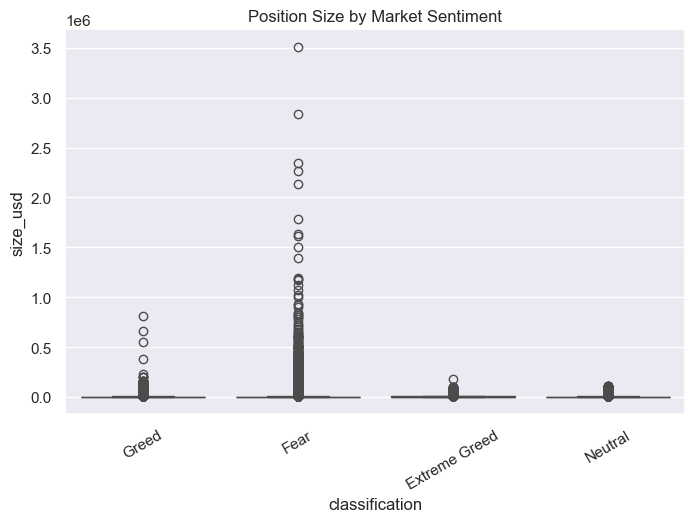

In [56]:
plt.figure(figsize=(8,5))
sns.boxplot(x='classification', y='size_usd', data=analysis_df)
plt.title("Position Size by Market Sentiment")
plt.xticks(rotation=30)
plt.show()

## Key Insights

1. Trader profitability varies significantly across market sentiment regimes.
2. Win rates tend to be higher during Fear phases, indicating more disciplined trading behavior.
3. During Greed and Extreme Greed periods, traders deploy larger position sizes, suggesting increased risk appetite.
4. Higher risk-taking during Greed is associated with greater variance in PnL outcomes.
5. These findings suggest that sentiment-aware risk management could improve trading performance.


## Conclusion

This analysis demonstrates that market sentiment plays a meaningful role in shaping trader behavior and outcomes.
By incorporating sentiment indicators into trading strategies, traders can better manage risk and improve consistency.
Future work could extend this analysis by incorporating leverage data and modeling sentiment-adjusted strategies.
